<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Исследуем-появляение-белой-полосы" data-toc-modified-id="Исследуем-появляение-белой-полосы-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Исследуем появляение белой полосы</a></span></li><li><span><a href="#Посмотрим-на-примере-симметричного-изображения-по-имени-yellow" data-toc-modified-id="Посмотрим-на-примере-симметричного-изображения-по-имени-yellow-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Посмотрим на примере симметричного изображения по имени yellow</a></span><ul class="toc-item"><li><span><a href="#Преобразование-исходного-изображения-или-после-нормализации." data-toc-modified-id="Преобразование-исходного-изображения-или-после-нормализации.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Преобразование исходного изображения или после нормализации.</a></span></li></ul></li><li><span><a href="#Проверяем-появление-белой-полосы-и-другие-эффекты-при-обработке-разных-изображений" data-toc-modified-id="Проверяем-появление-белой-полосы-и-другие-эффекты-при-обработке-разных-изображений-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Проверяем появление белой полосы и другие эффекты при обработке разных изображений</a></span><ul class="toc-item"><li><span><a href="#Белая-полоса-возникает-не-всегда" data-toc-modified-id="Белая-полоса-возникает-не-всегда-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Белая полоса возникает не всегда</a></span></li><li><span><a href="#На-месте-черного-цвета-проступает-изображение" data-toc-modified-id="На-месте-черного-цвета-проступает-изображение-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>На месте черного цвета проступает изображение</a></span></li><li><span><a href="#Появление-вертикальных-полос" data-toc-modified-id="Появление-вертикальных-полос-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Появление вертикальных полос</a></span></li></ul></li></ul></div>

# Исследуем появляение белой полосы

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import io, color, img_as_float
# img_as_float переводит имзображение в численное представление
# https://chat.openai.com/share/79755115-6b91-416e-ab70-b069c432674a


from IPython.display import display, Image
# для показывания изображения
# пример использования display(Image('gray_mandrill.png')) 
import cv2

In [2]:
mandrill = io.imread("https://raw.githubusercontent.com/JuliaImages/TestImages.jl/images/images/mandrill.tiff")

In [3]:
def normalize_image(im):   
    im_res = im - np.min(im)
    return (1 / np.max(im_res)) * im_res

def norm_columns(x):
    return x / np.sum(x, axis=0)


def norm_rows(x):  # убрала f, пока это мне не нужно
    return x / np.sum(x, axis=1)[:, np.newaxis]

In [4]:
def monochrome(rgb_image):
    coeffs = np.array([0.299, 0.587, 0.114]) 
    return rgb_image @ coeffs

# Посмотрим на примере симметричного изображения по имени yellow

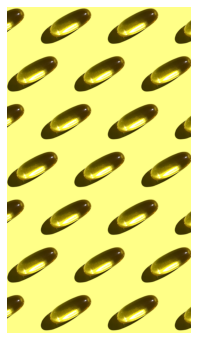

In [5]:
# загрузим симметричное изображение, на нем хорошо видны всякие эффекты
yellow = io.imread('https://images.unsplash.com/photo-1623066542605-bc25b4b662dd?w=500&auto=format&fit=crop&q=60&ixlib=rb-4.0.3'
                   '&ixid=M3wxMjA3fDB8MHx0b3BpYy1mZWVkfDI4fGlVSXNuVnRqQjBZfHxlbnwwfHx8fHw%3D')
plt.figure(figsize=(12, 6))
plt.imshow(yellow)
plt.axis('off')
plt.show()

Рассмотрим две ситуации:
- делаем нормализацию изображения по строкам, а потом общую нормализацию всего изображения
- делаем нормализацию изображения по строкам, потом прибавляем 1, а потом делаем общую нормализацию 

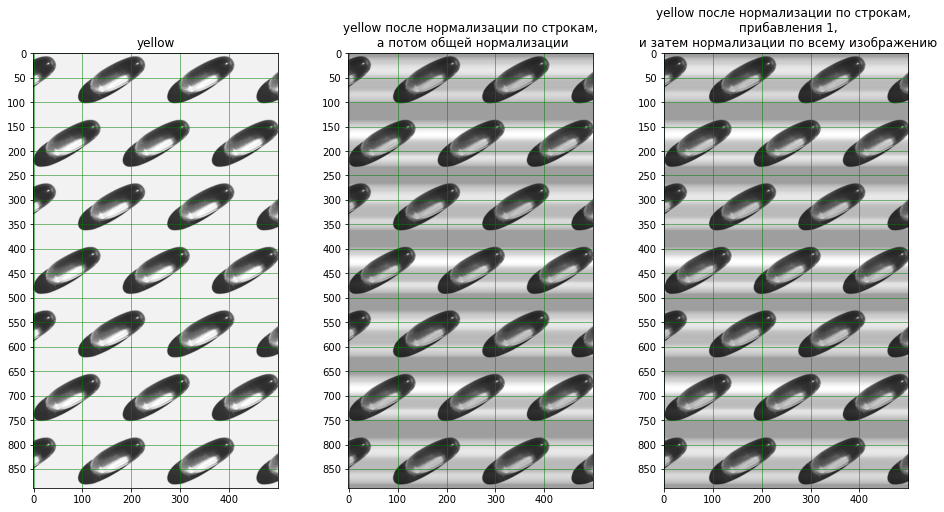

In [6]:
# Загрузка изображения
yellow = io.imread('https://images.unsplash.com/photo-1623066542605-bc25b4b662dd?w=500&auto=format&fit=crop&q=60&ixlib=rb-4.0.3'
                   '&ixid=M3wxMjA3fDB8MHx0b3BpYy1mZWVkfDI4fGlVSXNuVnRqQjBZfHxlbnwwfHx8fHw%3D')

fig, axes = plt.subplots(1, 3, figsize=(16, 8))

axes[0].imshow(monochrome(yellow), cmap='gray')
axes[0].set_title('yellow')
# Включение сетки
axes[0].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
# Необходимо включить отображение осей, если они были отключены
axes[0].set_xticks(range(0, yellow.shape[1], 100))  # Настройка делений сетки по оси X
axes[0].set_yticks(range(0, yellow.shape[0], 50))  # Настройка делений сетки по оси Y


axes[1].imshow(normalize_image(norm_rows(monochrome(yellow))), cmap='gray')
axes[1].set_title('yellow после нормализации по строкам,\n а потом общей нормализации')
axes[1].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
axes[1].set_xticks(range(0, yellow.shape[1], 100))  # Настройка делений сетки по оси X
axes[1].set_yticks(range(0, yellow.shape[0], 50))  # Настройка делений сетки по оси Y

axes[2].imshow(normalize_image(norm_rows(monochrome(yellow) + 1)), cmap='gray')
axes[2].set_title('yellow после нормализации по строкам, \n прибавления 1,\n и затем нормализации по всему изображению')
axes[2].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
axes[2].set_xticks(range(0, yellow.shape[1], 100))  # Настройка делений сетки по оси X
axes[2].set_yticks(range(0, yellow.shape[0], 50))  # Настройка делений сетки по оси Y

# Отображение фигуры с подграфиками
plt.show()


Выводы:
- светлые полосы образуются в обоих случаях, если прибавляем единицу и если нет
- уменьшение контрастности тоже происходит в обеих случаях
- светлые полосы оборазуются не потому, что какое-то место становится светлее. А потому, что если у нас в строке чередуются светлые и темные участки (с высокой контрастностью), то они и продолжат чередоваться. А вот если строка была однородно светлая (как диапазон 100<y<140 выше), то она становится равномерно серой. И вот **на фоне этого серого** возникают эти самые светлые полоски (например, диапазон 140<y<170 выше).

## Преобразование исходного изображения или после нормализации.

В Julia мы имели дело с нормализованным изображением. Нормализуем и посмотрим на результат.

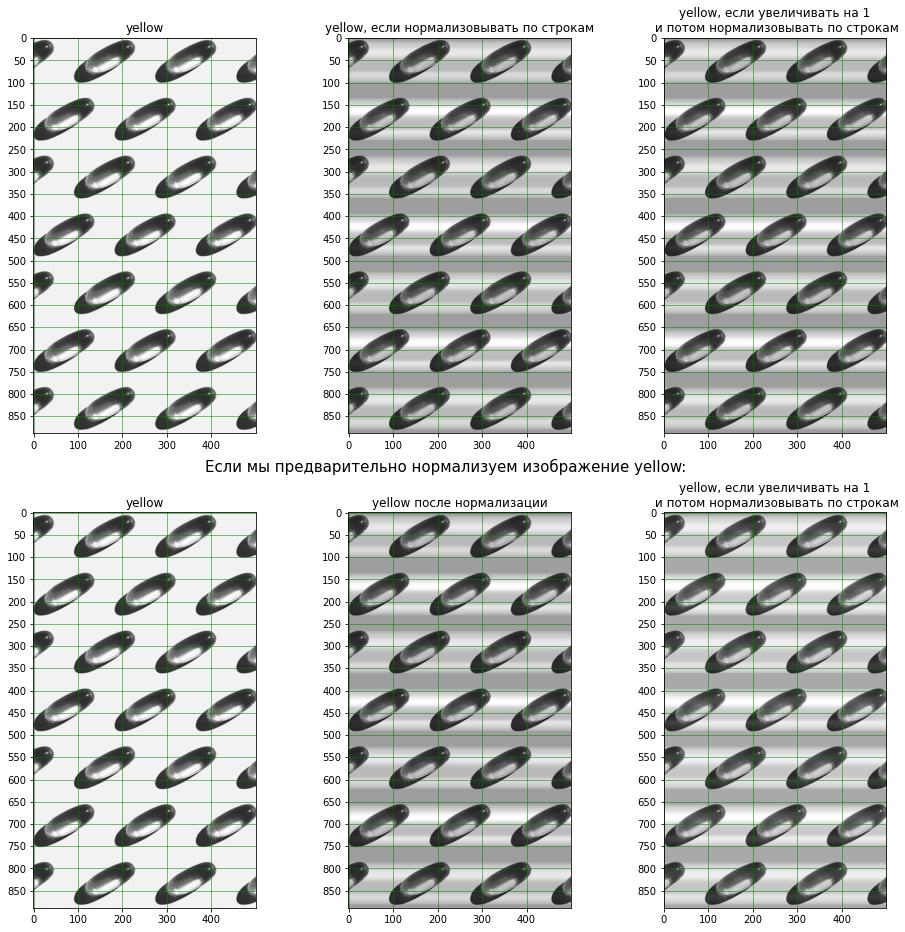

In [7]:
# Теперь сравним ситуации, когда мы работаем с изображением yellow и когда мы его изначально нормализуем

# Загрузка изображения
yellow = io.imread('https://images.unsplash.com/photo-1623066542605-bc25b4b662dd?w=500&auto=format&fit=crop&q=60&ixlib=rb-4.0.3'
                   '&ixid=M3wxMjA3fDB8MHx0b3BpYy1mZWVkfDI4fGlVSXNuVnRqQjBZfHxlbnwwfHx8fHw%3D')


fig, axes = plt.subplots(2, 3, figsize=(16, 16))

axes[0,0].imshow(monochrome(yellow), cmap='gray')
axes[0,0].set_title('yellow')
# Включение сетки
axes[0,0].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)

axes[0,0].set_xticks(range(0, yellow.shape[1], 100))  # Настройка делений сетки по оси X
axes[0,0].set_yticks(range(0, yellow.shape[0], 50))  # Настройка делений сетки по оси Y


axes[0,1].imshow(normalize_image(norm_rows(monochrome(yellow))), cmap='gray')
axes[0,1].set_title('yellow, если нормализовывать по строкам')
axes[0,1].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)

axes[0,1].set_xticks(range(0, yellow.shape[1], 100))  # Настройка делений сетки по оси X
axes[0,1].set_yticks(range(0, yellow.shape[0], 50))  # Настройка делений сетки по оси Y

axes[0,2].imshow(normalize_image(norm_rows(monochrome(yellow) + 1)), cmap='gray')
axes[0,2].set_title('yellow, если увеличивать на 1\n и потом нормализовывать по строкам')

axes[0,2].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)

axes[0,2].set_xticks(range(0, yellow.shape[1], 100))  # Настройка делений сетки по оси X
axes[0,2].set_yticks(range(0, yellow.shape[0], 50))  # Настройка делений сетки по оси Y


fig.text(0.5, 0.5, 'Если мы предварительно нормализуем изображение yellow:\n', ha='center', va='center', fontsize=15)
yellow_norm = normalize_image(monochrome(yellow))

axes[1,0].imshow(yellow_norm, cmap='gray')
axes[1,0].set_title('yellow')
axes[1,0].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
axes[1,0].set_xticks(range(0, yellow_norm.shape[1], 100))  # Настройка делений сетки по оси X
axes[1,0].set_yticks(range(0, yellow_norm.shape[0], 50))  # Настройка делений сетки по оси Y

axes[1,1].imshow(normalize_image(norm_rows(yellow_norm)), cmap='gray')
axes[1,1].set_title('yellow после нормализации')
axes[1,1].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
axes[1,1].set_xticks(range(0, yellow.shape[1], 100))  # Настройка делений сетки по оси X
axes[1,1].set_yticks(range(0, yellow.shape[0], 50))  # Настройка делений сетки по оси Y

axes[1,2].imshow(normalize_image(norm_rows(yellow_norm + 1)), cmap='gray')
axes[1,2].set_title('yellow, если увеличивать на 1\n и потом нормализовывать по строкам')
axes[1,2].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
axes[1,2].set_xticks(range(0, yellow.shape[1], 100))  # Настройка делений сетки по оси X
axes[1,2].set_yticks(range(0, yellow.shape[0], 50))  # Настройка делений сетки по оси Y

# Отображение фигуры с подграфиками
plt.show()


Вывод - визуально изображение меняется похожим образом, если мы делаем предварительную нормализацию и если нет.


Теперь стоит проверить, есть ли разница между обработанными изображениеми, если делать изеначальную нормализацию и если нет (потому что наверху они выглядят абсолютно одинаковыми)

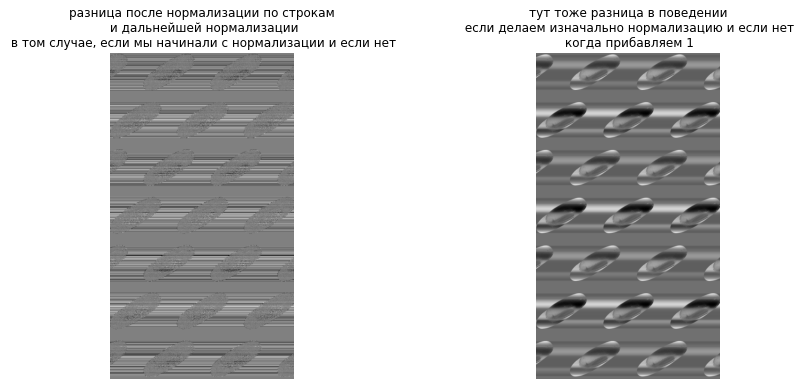

In [8]:
yellow_norm = normalize_image(monochrome(yellow))
delta = normalize_image(norm_rows(monochrome(yellow))) - normalize_image(norm_rows(yellow_norm))
delta_1 = normalize_image(norm_rows(monochrome(yellow)+1)) - normalize_image(norm_rows(yellow_norm+1))

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].imshow(delta, cmap = 'gray')
axes[0].set_title(
'разница после нормализации по строкам\n и дальнейшей нормализации\n в том случае, если мы начинали с нормализации и если нет')
axes[0].axis('off')


axes[1].imshow(delta_1, cmap = 'gray')
axes[1].set_title(
'тут тоже разница в поведении\n если делаем изначально нормализацию и если нет\n когда прибавляем 1')
axes[1].axis('off')
plt.show()

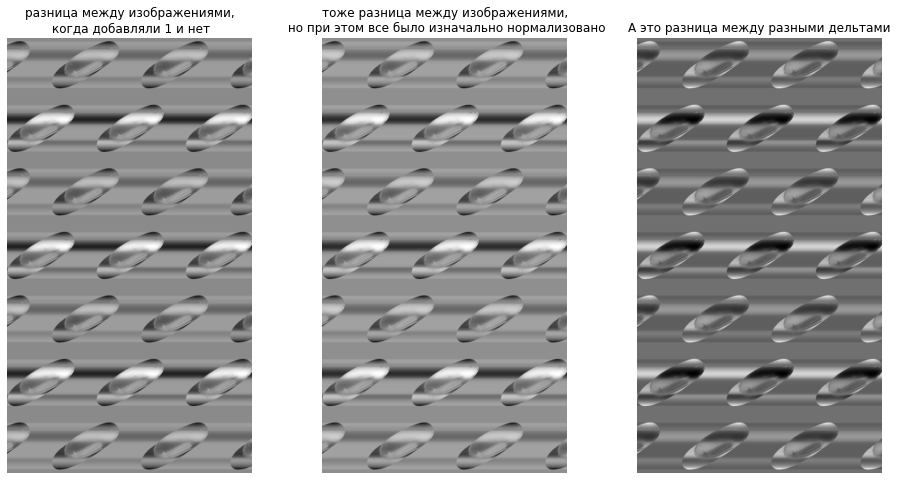

In [9]:
# а тут наоборот, смотрим разницу между тем, когда прибаляли 1 и когда нет для нормализованных и нет изображений
delta = normalize_image(norm_rows(monochrome(yellow) + 1))-normalize_image(norm_rows(monochrome(yellow)))


yellow_norm = normalize_image(monochrome(yellow))
delta_norm = normalize_image(norm_rows(yellow_norm + 1))-normalize_image(norm_rows(yellow_norm))

delta_between_delta=(normalize_image(norm_rows(monochrome(yellow) + 1))-normalize_image(norm_rows(monochrome(yellow))
                                                                  ))-(normalize_image(norm_rows(
    yellow_norm + 1))-normalize_image(norm_rows(yellow_norm)))


# разница, есть, но она не зависит от того, проводим ли мы заранее нормализаций

fig, axes = plt.subplots(1, 3, figsize=(16, 8))

axes[0].imshow(delta, cmap = 'gray')
axes[0].axis('off')  # Отключение отображения осей для первого изображения
axes[0].set_title('разница между изображениями,\n когда добавляли 1 и нет')

# Отображение второго изображения
axes[1].imshow(delta_norm, cmap = 'gray')
axes[1].axis('off')  # Отключение отображения осей для второго изображения
axes[1].set_title('тоже разница между изображениями,\n но при этом все было изначально нормализовано')

axes[2].imshow(delta_between_delta, cmap = 'gray')
axes[2].axis('off')  # Отключение отображения осей для второго изображения
axes[2].set_title('А это разница между разными дельтами')

plt.show()


Таким образом:
- есть различия между результатами обработки в том случае , если изначальное изображение было нормализовано и нет
- есть отличие между изображениями, когда добавляли 1 и нет
- в изображении дельты возникает другая периодичность. Не светлая полоска на каждый ряд овалов (капсул), а темная, и не на каждый ряд, а через ряд

**Поскольку преобразование выглядит аналогично независимо от того, нормализовали ли мы исходное изображение, то будем его нормализовать перед обработкой.**

Например, потому что в Julia мы имели дело с нормализованными изображениями.


И посмотрим, как будут выглядеть другие изображения после обработки

# Проверяем появление белой полосы и другие эффекты при обработке разных изображений

## Белая полоса возникает не всегда

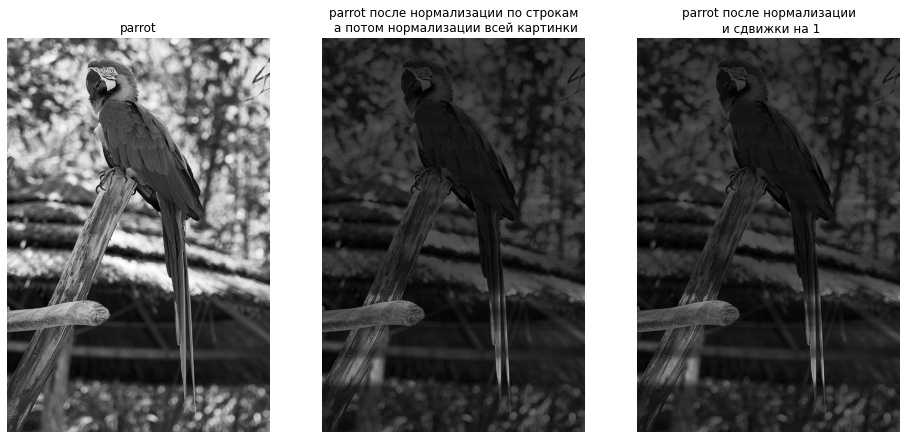

In [10]:
parrot_raw = io.imread("https://images.unsplash.com/photo-1534567059665-cbcfe2e73b91?q=80&w=1887&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D")
parrot = normalize_image(monochrome(parrot_raw))
fig, axes = plt.subplots(1, 3, figsize=(16, 8))

# Отображение первого изображения
axes[0].imshow(parrot, cmap = 'gray')
axes[0].axis('off')  # Отключение отображения осей для первого изображения
axes[0].set_title('parrot')


# Отображение второго изображения
axes[1].imshow(normalize_image(norm_rows(parrot)), cmap = 'gray')
axes[1].axis('off')  # Отключение отображения осей для второго изображения
axes[1].set_title('parrot после нормализации по строкам\n а потом нормализации всей картинки')

# Отображение второго изображенияb
axes[2].imshow(normalize_image(norm_rows(parrot)+1), cmap = 'gray')
axes[2].axis('off')  # Отключение отображения осей для второго изображения
axes[2].set_title('parrot после нормализации\n и сдвижки на 1')

# Отображение фигуры с подграфиками
plt.show()


У попугая никакой белой полосы не появляется, только картинка темнеет. Возможно, потому, что исходная картинка очень пестрая. Без темных и светлых полос.

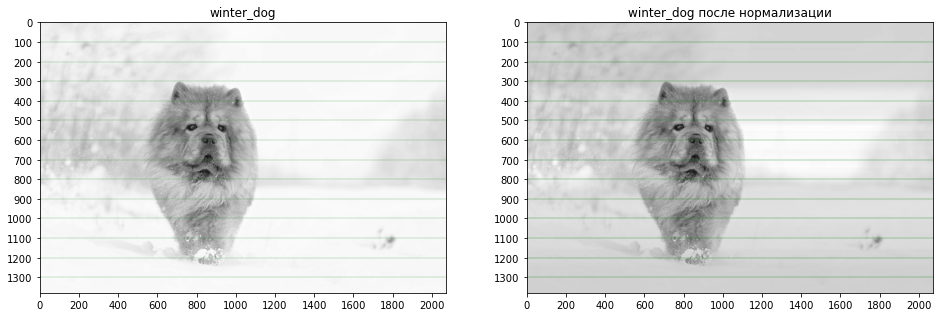

In [11]:
winter_dog_raw = io.imread("https://images.unsplash.com/photo-1678357437275-a4016d7faafd?q=80&w=2070&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D")
winter_dog = normalize_image(monochrome(winter_dog_raw))

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
# Отображение первого изображения
axes[0].imshow(winter_dog, cmap = 'gray')
axes[0].grid(True, which='both', axis='y', color='green', linestyle='-', linewidth=0.2)
# Необходимо включить отображение осей, если они были отключены
axes[0].set_xticks(range(0, winter_dog.shape[1], 200))  # Настройка делений сетки по оси X
axes[0].set_yticks(range(0, winter_dog.shape[0], 100))  # Настройка делений сетки по оси Y

axes[0].set_title('winter_dog')

# Отображение второго изображения
axes[1].imshow(normalize_image(norm_rows(winter_dog+1)), cmap = 'gray')
axes[1].grid(True, which='both', axis = 'y',  color='green', linestyle='-', linewidth=0.3)
axes[1].set_xticks(range(0, winter_dog.shape[1], 200))  # Настройка делений сетки по оси X
axes[1].set_yticks(range(0, winter_dog.shape[0], 100))  # Настройка делений сетки по оси Y
axes[1].set_title('winter_dog после нормализации')

# Отображение фигуры с подграфиками
plt.show()

- Здесь нет таких светлых горизонтальных областей
- но небольшая белая полоса возникает в диапазоне y между 500 и 600
- и она тоже видна благодаря тому , что светлые области выше и ниже стали темнее.

## На месте черного цвета проступает изображение

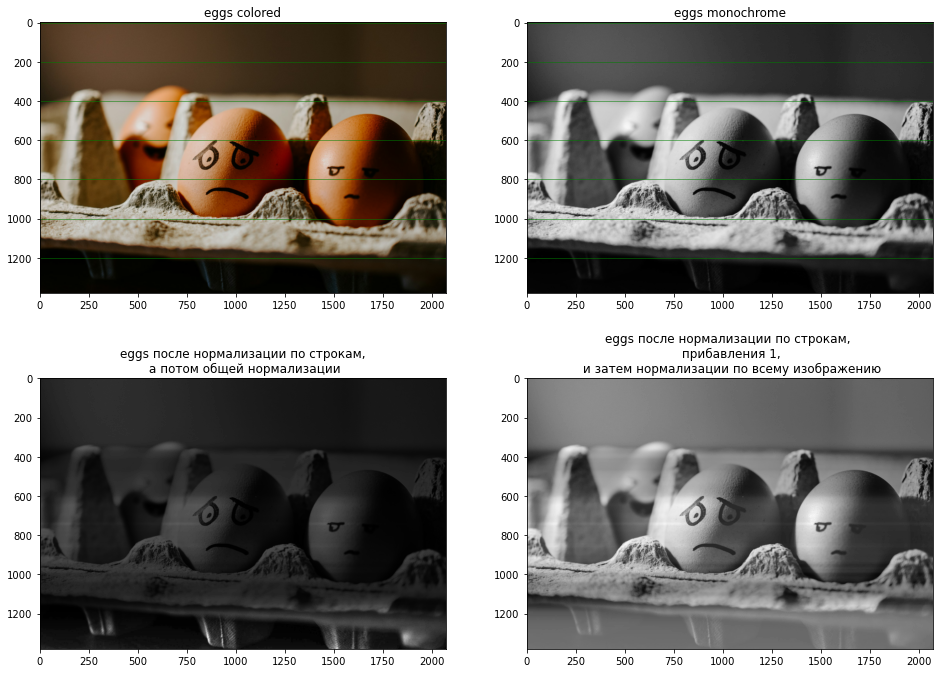

In [12]:
eggs_raw = io.imread('https://images.unsplash.com/photo-1617440168937-c6497eaa8db5?q=80&w=2070&auto'
                '=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D')
eggs = normalize_image(monochrome(eggs_raw))

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

axes[0,0].imshow(eggs_raw)
axes[0,0].set_title('eggs colored')
# Включение сетки
axes[0,0].grid(True, which='both', axis = 'y', color='green', linestyle='-', linewidth=0.5)
axes[0,0].set_yticks(range(0, eggs.shape[0], 200))  # Настройка делений сетки по оси Y

axes[0,1].imshow(eggs, cmap='gray')
axes[0,1].set_title('eggs monochrome')
# Включение сетки
axes[0,1].grid(True, which='both', axis = 'y', color='green', linestyle='-', linewidth=0.5)
axes[0,1].set_yticks(range(0, eggs.shape[0], 200))  # Настройка делений сетки по оси Y


axes[1,0].imshow(normalize_image(norm_rows(eggs)), cmap='gray')
axes[1,0].set_title('eggs после нормализации по строкам,\n а потом общей нормализации')
#axes[1,0].grid(True, which='both', axis = 'y', color='green', linestyle='-', linewidth=0.5)
axes[1,0].set_yticks(range(0, eggs.shape[0], 200))  # Настройка делений сетки по оси Y

axes[1,1].imshow(normalize_image(norm_rows(eggs + 1)), cmap='gray')
axes[1,1].set_title('eggs после нормализации по строкам, \n прибавления 1,\n и затем нормализации по всему изображению')
#axes[1,1].grid(True, which='both', axis = 'y', color='green', linestyle='-', linewidth=0.5)
axes[1,1].set_yticks(range(0, eggs.shape[0], 200))  # Настройка делений сетки по оси Y

# Отображение фигуры с подграфиками
plt.show()

А вот что получилось с яйцами:
- тонкая полоска появилась, хотя нет светлого места рядом (как в изображении yellow выше)
- стало видно изображение, которое раньше нельзя было различить на черном фоне. Что там внизу упаковки для яиц (y>1200). Потому что если у нас вся строка очень темная, то есть состояит из маленьких чисел, то нормализация по строке выделяет даже чуть отличающиеся от абсолютной черноты участки

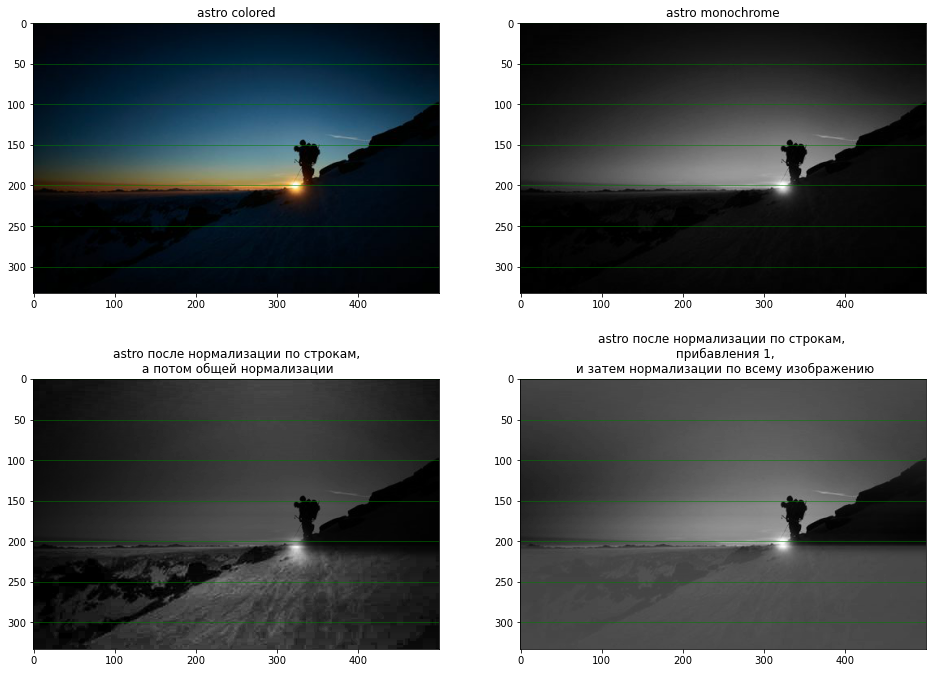

In [13]:
astro_raw = io.imread('https://images.unsplash.com/photo-1707162798192-b32a573ca3a8?w=500&auto=format&fit=crop&q=60&ixlib='
                  'rb-4.0.3&ixid=M3wxMjA3fDB8MHxlZGl0b3JpYWwtZmVlZHwxMHx8fGVufDB8fHx8fA%3D%3D')
astro = normalize_image(monochrome(astro_raw))

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

axes[0,0].imshow(astro_raw)
axes[0,0].set_title('astro colored')
# Включение сетки
axes[0,0].grid(True, which='both', axis = 'y', color='green', linestyle='-', linewidth=0.5)
axes[0,0].set_yticks(range(0, astro.shape[0], 50))  # Настройка делений сетки по оси Y

axes[0,1].imshow(astro, cmap='gray')
axes[0,1].set_title('astro monochrome')
# Включение сетки
axes[0,1].grid(True, which='both', axis = 'y', color='green', linestyle='-', linewidth=0.5)
axes[0,1].set_yticks(range(0, astro.shape[0], 50))  # Настройка делений сетки по оси Y


axes[1,0].imshow(normalize_image(norm_rows(astro)), cmap='gray')
axes[1,0].set_title('astro после нормализации по строкам,\n а потом общей нормализации')
axes[1,0].grid(True, which='both', axis = 'y', color='green', linestyle='-', linewidth=0.5)
axes[1,0].set_yticks(range(0, astro.shape[0], 50))  # Настройка делений сетки по оси Y

axes[1,1].imshow(normalize_image(norm_rows(astro + 1)), cmap='gray')
axes[1,1].set_title('astro после нормализации по строкам, \n прибавления 1,\n и затем нормализации по всему изображению')
axes[1,1].grid(True, which='both', axis = 'y', color='green', linestyle='-', linewidth=0.5)
axes[1,1].set_yticks(range(0, astro.shape[0], 50))  # Настройка делений сетки по оси Y

# Отображение фигуры с подграфиками
plt.show()

Что происходит в этой картинке наблюдения за восходом **astro**:
- также, как и в случае с яйцами, мы видим, как на месте тотально черного цвета проступает изображение (это область ниже примерно 190)
- светлая полоса появляется, почему-то только в том изображении, где мы не прибавляли 1


## Появление вертикальных полос

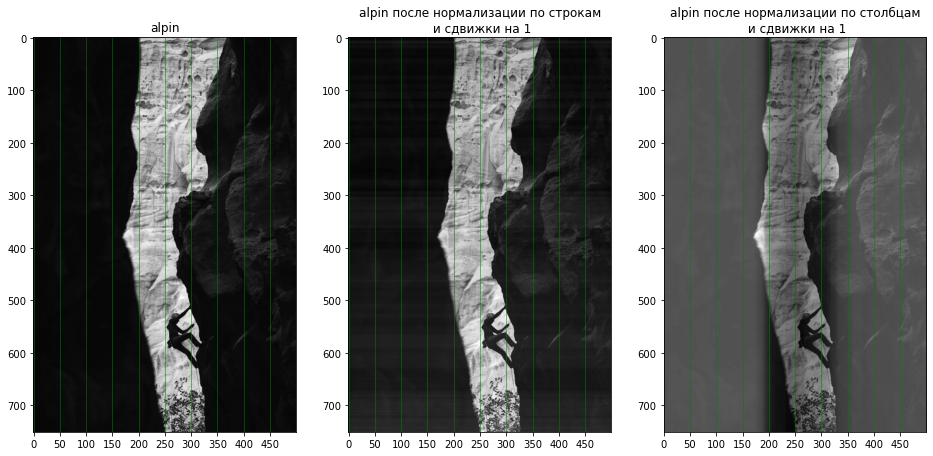

In [14]:
alpin_raw = io.imread('https://images.unsplash.com/photo-1683009427041-d810728a7cb6?w=500&auto=format&fit=crop&q='
                 '60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDF8MHxlZGl0b3JpYWwtZmVlZHw2fHx8ZW58MHx8fHx8')

alpin = normalize_image(monochrome(alpin_raw))

fig, axes = plt.subplots(1, 3, figsize=(16, 8))


axes[0].imshow(alpin, cmap = 'gray')
axes[0].set_title('alpin')
axes[0].grid(True, which='both', axis = 'x', color='green', linestyle='-', linewidth=0.5)
axes[0].set_xticks(range(0, alpin.shape[1], 50))  # Настройка делений сетки по оси X


axes[1].imshow(normalize_image(norm_rows(alpin+1)), cmap = 'gray')
axes[1].set_title('alpin после нормализации по строкам\n и сдвижки на 1')
axes[1].grid(True, which='both', axis = 'x', color='green', linestyle='-', linewidth=0.5)
axes[1].set_xticks(range(0, alpin.shape[1], 50))  # Настройка делений сетки по оси X


axes[2].imshow(normalize_image(norm_columns(alpin+1)), cmap = 'gray')
axes[2].set_title('alpin после нормализации по столбцам\n и сдвижки на 1')
axes[2].grid(True, which='both', axis = 'x', color='green', linestyle='-', linewidth=0.5)
axes[2].set_xticks(range(0, alpin.shape[1], 50))  # Настройка делений сетки по оси X

# Отображение фигуры с подграфиками
plt.show()

И вот здесь у нас нет горизонтальных светлых полос, зато есть вертикальные **серые** полосы. И они связаны с тем, что боковые области сильно осветляются и выглядят серыми вместо черного. 
- при нормализации по строкам нет значимых изменений по сравнению с монохромным нормализованным изображением
- А при нормализации по столбцам
  - область 190<x<320 осталась примерноно такой , как была
  - А области x<190 и x>320 стали заметно светлее (сереее)
  - и за счет этого видны темные полосы. Нкапример, для 280<x<300, 300<y<500

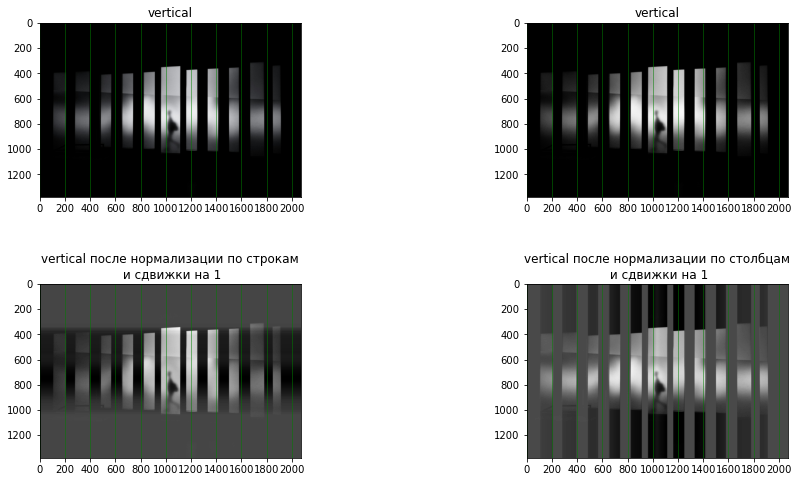

In [19]:
vertical_raw = io.imread('https://images.unsplash.com/photo-1499428665502-503f6c608263?q=80&w=2070&auto=format&fit=crop&ixlib'
                         '=rb-4.0.3,&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D')
vertical = normalize_image(monochrome(vertical_raw))


fig, axes = plt.subplots(2, 2, figsize=(16, 8))

plt.subplots_adjust(hspace=0.5)

axes[0,0].imshow(vertical_raw, cmap = 'gray')
axes[0,0].set_title('vertical')
axes[0,0].grid(True, which='both', axis = 'x', color='green', linestyle='-', linewidth=0.5)
axes[0,0].set_xticks(range(0, vertical.shape[1], 200))  # Настройка делений сетки по оси X

axes[0,1].imshow(vertical, cmap = 'gray')
axes[0,1].set_title('vertical')
axes[0,1].grid(True, which='both', axis = 'x', color='green', linestyle='-', linewidth=0.5)
axes[0,1].set_xticks(range(0, vertical.shape[1], 200))  # Настройка делений сетки по оси X


axes[1,0].imshow(normalize_image(norm_rows(vertical+1)), cmap = 'gray')
axes[1,0].set_title('vertical после нормализации по строкам\n и сдвижки на 1')
axes[1,0].grid(True, which='both', axis = 'x', color='green', linestyle='-', linewidth=0.5)
axes[1,0].set_xticks(range(0, vertical.shape[1], 200))  # Настройка делений сетки по оси X



axes[1,1].imshow(normalize_image(norm_columns(vertical+1)), cmap = 'gray')
axes[1,1].set_title('vertical после нормализации по столбцам\n и сдвижки на 1')
axes[1,1].grid(True, which='both', axis = 'x', color='green', linestyle='-', linewidth=0.5)
axes[1,1].set_xticks(range(0, vertical.shape[1], 200))  # Настройка делений сетки по оси X

# Отображение фигуры с подграфиками
plt.show()

При обработке картины с вертикальными полосами:
- нормализация по строкам, как мы и ожидали, 
  - не меняет структуры 
  - просто превращает черное в серое (то есть там, где пиксели равны нулю, они возрвстают за счет нормализаци). Это, например, область с у<150
- нормализация по столбцам создает серые полосы. При этом тут серая полоса именно появляется, а не выглядит серой на фоне изменившегося цвета соселних областей. Например, такая серая полоса видна для х=600, где в исходной картине такой полосы не было.  